In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [55]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pycaret

     |████████████████████████████████| 252 kB 488 kB/s eta 0:00:01
     |████████████████████████████████| 13.9 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 259 kB 44.3 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 326 kB 49.8 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 3.6 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 46.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 47.2 MB/s eta 0:00:01


     |████████████████████████████████| 2.1 MB 38.0 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 3.1 MB 61.3 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 46.3 MB/s eta 0:00:01


     |████████████████████████████████| 45 kB 1.8 MB/s  eta 0:00:01
  Created wheel for pyod: filename=pyod-0.8.2-py3-none-any.whl size=110196 sha256=08e99b1a770d6678c911ac734f4f0584c25989c6e6d3235e50b6b51e0c52a494
  Stored in directory: /root/.cache/pip/wheels/07/8d/4a/73b69c4a2ffa4ff4a5347c43afb43c48871465a1211e22d117
  Created wheel for databricks-cli: filename=databricks_cli-0.11.0-py3-none-any.whl size=90300 sha256=16bf4c6351dd9e06212e1cfa240e53e7b50661afd12f86b4d3211998824aede7
  Stored in directory: /root/.cache/pip/wheels/81/3f/18/5678c9d403583e583a251463196998b17852b98de34aa9ab51
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.16.4-py3-none-any.whl size=16809 sha256=12bd622363614ff885bf58b01760c0942e6857f130ebb21fad5cf813216e13df
  Stored in directory: /root/.cache/pip/wheels/ab/b7/81/fcb6547822cfc8ad8254f7be8cf9f9180a7527db6ef225a2b4
  Created wheel for querystring-parser: filename=querystring_parser-1.2.4-py3-none-any.whl size=7076 sha256=

  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.6.0
    Uninstalling pandas-profiling-2.6.0:
      Successfully uninstalled pandas-profiling-2.6.0


In [33]:
# Importing our dataset
df=pd.read_csv('../input/heart-disease-uci/heart.csv')

In [35]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Toh doston,Chaliye shuru karte hain 
# Let us start our EDA
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Checking for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Ok so we have no missing values. 

In [12]:
# Let us seperate our target variable from the features so that we can build a model. We will be using a Supervised learning 
# approach in this notebook by making using of different classifiers, cross-validating,among other things.


x=df.iloc[:,:-1].values
y=df.target


In [13]:
# let us look at x and y

x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

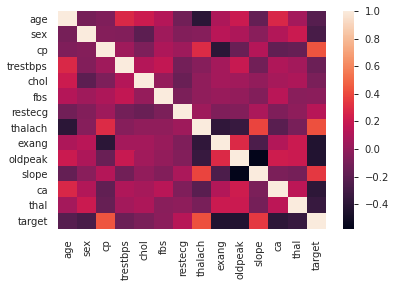

In [21]:
# let us look at the correlation of different features with the target variable

matrix=df.corr()
sns.heatmap(matrix)

In [19]:
print(matrix['target'])

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64


As you can see features are not highly correlated with the target varibale. The max correlation is 0.433 for the feature namely 'cp'

Let us now look at individual d=features in depth by using the pandas_profiling library. See below

In [26]:
profile = pp.ProfileReport(df, title='Heart Disease Dataset Report')

In [27]:
profile

> Go through the above report generated using pandas-profiling to get better insight about individual features.



In [29]:
# let us look at the skew of different features 
print(df.skew())

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64


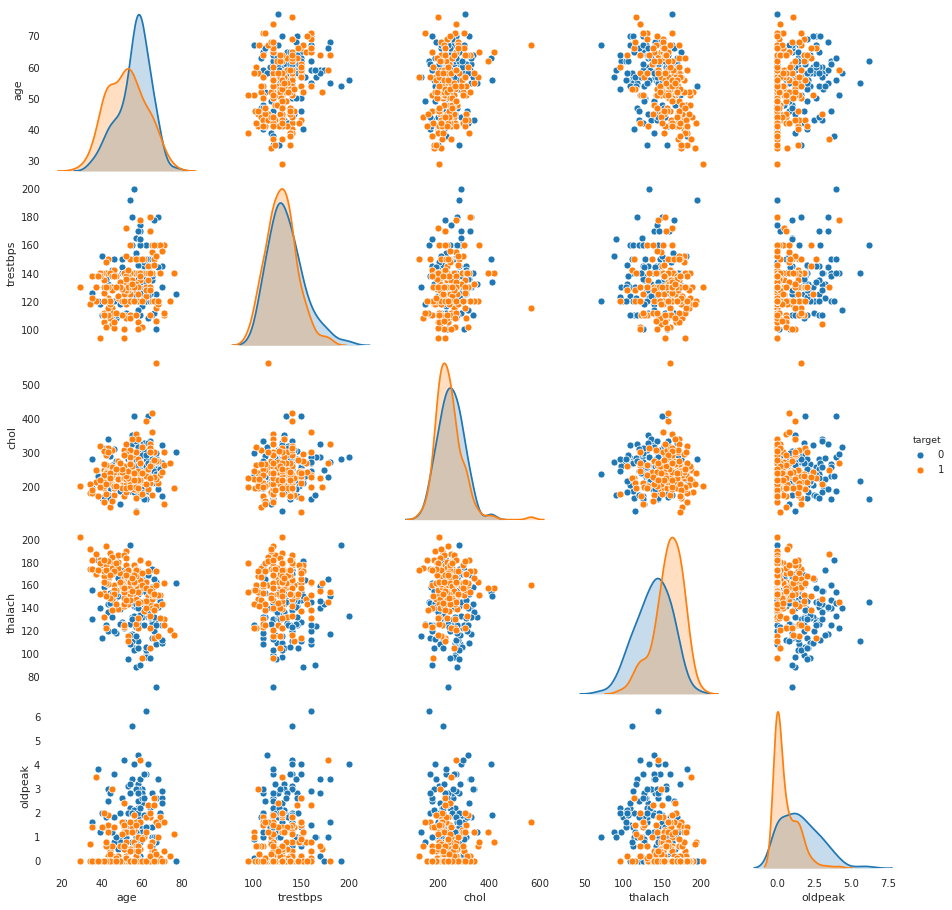

In [44]:
# Let us plot all the features except the one with binary values or repeating values ('I am doing this to viualise the variance in 
#  variance exhibited by other fetures')
# Creating a new dataframe and dropping all the columns that are not required in the visual
df1=df.drop([ 'sex', 'cp',   'fbs', 'restecg', 
       'exang',  'slope', 'ca', 'thal'],axis=1)
sns.pairplot(df1,hue='target')

We can use a log tranformation on the dataset to reduce the skew and try to transform the datset as closely as possible to a normal distribution. However let us first try by using some classification models and then let us see what we shall do next.

In [57]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [63]:
from pycaret.classification import * 
exp = setup(data = df, target = 'target', session_id=1,
                  normalize = True,
                categorical_features = [ 'sex', 'cp',  'fbs', 'restecg', 
       'exang',  'slope' , 'thal', ],
                numeric_features=['age','trestbps','chol','thalach','oldpeak','ca'],
                categorical_imputation='mode',
                numeric_imputation='mean',
            remove_outliers=True,
            outliers_threshold=0.1,
            normalize_method='robust',
            feature_selection=True,
            feature_selection_threshold=0.9,
            remove_multicollinearity=True,
            train_size=0.8
            
                )

Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(303, 14)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


So our PyCaret setup is now successful. I have set the train size at 80 % and teest size at 20%. You can play around with these values to find the ideal ratio. Let us now comapre our models.


In [64]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.8206,0.8519,0.8288,0.8478,0.8371,0.6373,0.6391,0.0038
1,Logistic Regression,0.8069,0.8751,0.8526,0.8177,0.8332,0.6046,0.6082,0.0140
2,Extra Trees Classifier,0.8061,0.8632,0.8603,0.8109,0.8329,0.6010,0.6080,0.2763
3,Naive Bayes,0.8017,0.8665,0.8109,0.8301,0.8178,0.5991,0.6032,0.0047
4,CatBoost Classifier,0.7976,0.8550,0.8436,0.8042,0.8224,0.5854,0.5883,1.3389
5,Extreme Gradient Boosting,0.7974,0.8476,0.8506,0.8050,0.8244,0.5812,0.5881,0.0388
6,Light Gradient Boosting Machine,0.7933,0.8543,0.8346,0.8058,0.8186,0.5761,0.5798,0.0219
7,Linear Discriminant Analysis,0.7885,0.8699,0.7955,0.8248,0.8078,0.5736,0.5771,0.0056
8,Ada Boost Classifier,0.7790,0.8159,0.8288,0.7895,0.8063,0.5483,0.5555,0.1086
9,Ridge Classifier,0.7747,0.0000,0.7955,0.8022,0.7973,0.5443,0.5464,0.0063


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

As you can see the results obtained were not that great.The maximum accuracy that we obtained was around 82 % with KNN classifier and a 10 fold cross validation. Let us see what happens if we dont remove the outliers.

In [65]:
from pycaret.classification import * 
exp = setup(data = df, target = 'target', session_id=1,
                  normalize = True,
                categorical_features = [ 'sex', 'cp',  'fbs', 'restecg', 
       'exang',  'slope' , 'thal', ],
                numeric_features=['age','trestbps','chol','thalach','oldpeak','ca'],
                categorical_imputation='mode',
                numeric_imputation='mean',
            normalize_method='robust',
            feature_selection=True,
            feature_selection_threshold=0.9,
            remove_multicollinearity=True,
            train_size=0.8
            
                )

Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(303, 14)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [66]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8472,0.9083,0.8940,0.8443,0.8645,0.6893,0.6995,0.0150
1,Ridge Classifier,0.8388,0.0000,0.8863,0.8376,0.8570,0.6724,0.6831,0.0065
2,Linear Discriminant Analysis,0.8388,0.9047,0.8863,0.8376,0.8570,0.6724,0.6831,0.0055
3,K Neighbors Classifier,0.8305,0.8783,0.8544,0.8572,0.8462,0.6560,0.6743,0.0042
4,Extra Trees Classifier,0.8180,0.8989,0.8484,0.8280,0.8340,0.6322,0.6411,0.2778
5,Gradient Boosting Classifier,0.7975,0.8836,0.8632,0.7913,0.8218,0.5875,0.5993,0.1111
6,CatBoost Classifier,0.7970,0.9077,0.8467,0.8023,0.8165,0.5883,0.6025,1.3045
7,Extreme Gradient Boosting,0.7890,0.8821,0.8247,0.8058,0.8070,0.5731,0.5882,0.0464
8,SVM - Linear Kernel,0.7857,0.0000,0.8192,0.8033,0.8059,0.5661,0.5772,0.0055
9,Random Forest Classifier,0.7810,0.8737,0.7654,0.8350,0.7911,0.5611,0.5738,0.1143


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

An instant increase of 2% in the accuracy . Let us now use only a select few features based on their correlation and see if this affects our model in anyway.